***About The Dataset***

*This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them*

***analytics Questions***
*1. What factors(features) affect test scores most?*

In [89]:
#importing the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
#Loading the dataset
df=pd.read_csv('students_score.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


***Data Preprocessing***

In [91]:
#describing the data
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [92]:
#checking for null values, dtypes of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [93]:
#checking how many null values in particular columns
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [94]:
#removing the null values
df.dropna(inplace=True)

In [95]:
#removing the unwanted column
df=df.drop(columns=['Unnamed: 0'], axis=1)
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,male,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


***gender distribution***

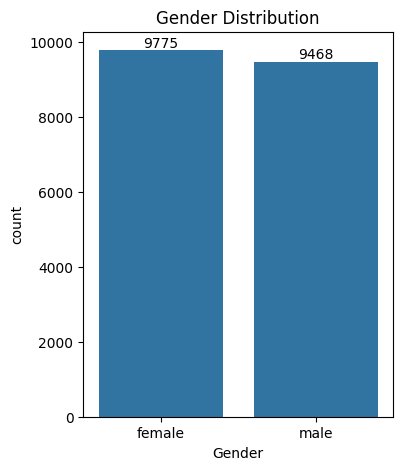

In [108]:
#Countplot for gender column
plt.figure(figsize=(4,5))
plt.title('Gender Distribution')
a=sns.countplot(data=df, x='Gender')
a.bar_label(a.containers[0])
plt.show()

from the above chart, number of females is is more when compared to number of males 

In [111]:
#Checking weather the parents education impacting the students score
p1=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p1

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.541478,71.317685,70.551080
bachelor's degree,70.724379,73.560401,73.873964
high school,64.294461,67.284124,65.495892
master's degree,72.293680,75.922677,76.423792
some college,66.578305,69.300113,68.651525
some high school,62.522417,65.438218,63.572171


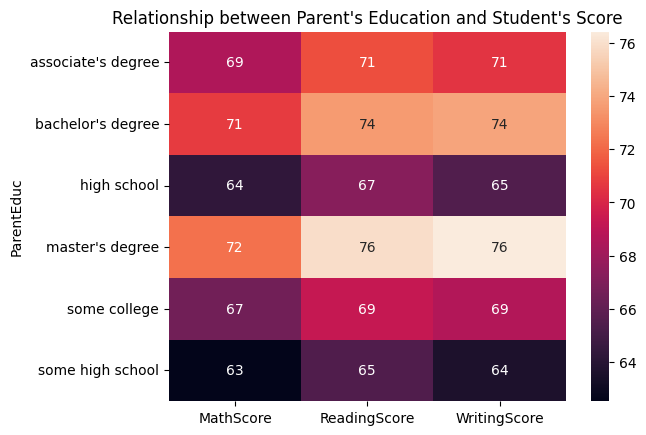

In [112]:
#plotting the above values in heatmap for better understanding
sns.heatmap(p1, annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

*from the above chart the parents education is making impact in students marks*

In [115]:
#checking for parentsMarital Status and students marks
p2=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p2

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.730344,69.816339,68.954545
married,66.705241,69.474248,68.488509
single,66.285590,69.388021,68.543403
widowed,68.083784,70.662162,69.651351


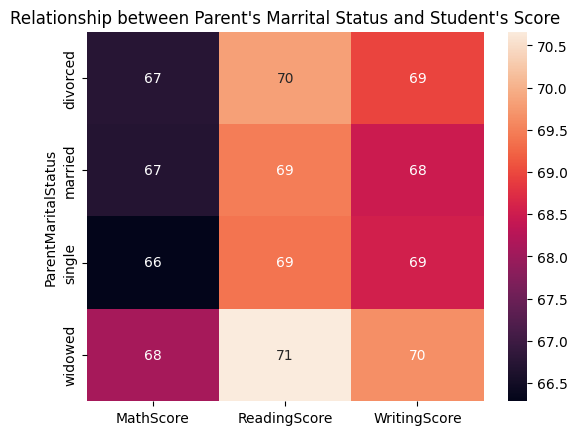

In [116]:
#visualizing the above values in heatmap
sns.heatmap(p2, annot=True)
plt.title("Relationship between Parent's Marrital Status and Student's Score")
plt.show()

*Parents Marital Status is not making much impact or there no/ negligabe impact on the students*

In [125]:
#checking for Lunch Type and students marks
p3=df.groupby('LunchType').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p3

,MathScore,ReadingScore,WritingScore
LunchType,,,
free/reduced,58.859253,64.269680,62.750406
standard,70.857200,72.392479,71.780148


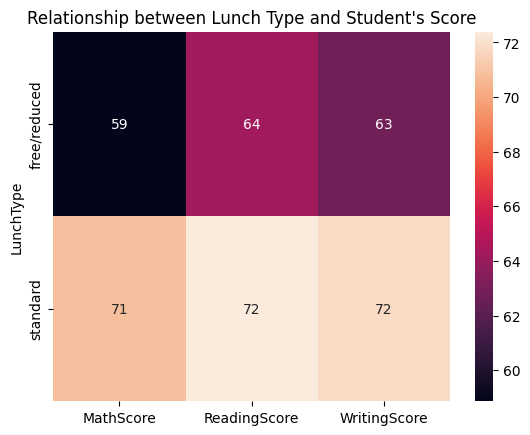

In [118]:
#visualizing the above values in heatmap
sns.heatmap(p3, annot=True)
plt.title("Relationship between Lunch Type and Student's Score")
plt.show()

*From the above map, we conclude that the LunchType is impacting the students score*

In [124]:
#checking for Test Preparation and students marks
p4=df.groupby('TestPrep').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p4

,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.649639,73.859826,74.862981
none,65.041630,67.247001,65.292524


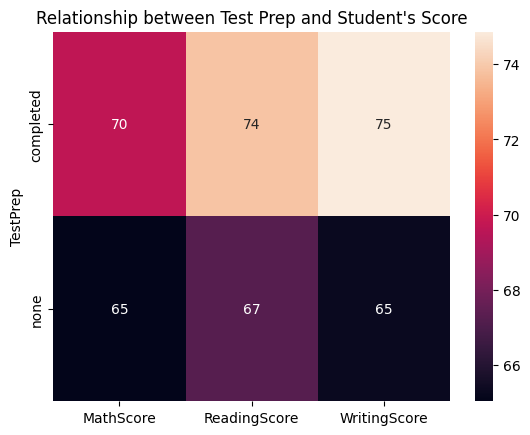

In [122]:
#visualizing the above values in heatmap
sns.heatmap(p4, annot=True)
plt.title("Relationship between Test Prep and Student's Score")
plt.show()

*From the map we conclude that, this making a medium impact on student score*

In [127]:
#checking for parentsMarital Status and students marks
p5=df.groupby('PracticeSport').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p5

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.593871,68.774244,67.021334
regularly,67.636547,69.950791,69.641439
sometimes,66.461143,69.438085,68.279568


*from this, the Practice Sport is not impacting the students score*

In [130]:
#checking for Is FIrst Child and students marks
p6=df.groupby('IsFirstChild').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p6

,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.464401,69.398623,68.557867
yes,66.729564,69.608923,68.627607


*This First child is not impacting the Students Score*

In [133]:
#checking for Number of Siblings and students marks
p7=df.groupby('NrSiblings').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p7

,MathScore,ReadingScore,WritingScore
NrSiblings,,,
0.0,66.789262,69.845961,68.961867
1.0,66.579434,69.409839,68.416127
2.0,66.472631,69.433282,68.486041
3.0,66.800097,69.620039,68.787996
4.0,66.356665,69.433865,68.502831
5.0,66.940211,69.702227,68.583822
6.0,67.568182,69.170455,68.301136
7.0,67.557895,70.973684,70.310526


*this is not making that much impact on students score*

In [150]:
#checking for TransportMeans and students marks
p8=df.groupby('TransportMeans').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p8

,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.518900,69.520030,68.590481
school_bus,66.717819,69.544415,68.611613


*Not impacting the students score*

In [138]:
#checking for Is FIrst Child and students marks
p9=df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p9

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.957425,69.775598,68.793123
< 5,64.605650,68.431518,67.359227
> 10,68.878382,70.545644,69.998811


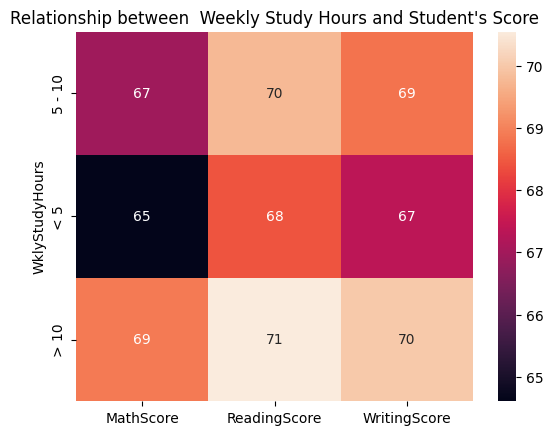

In [139]:
#visualizing the above values in heatmap
sns.heatmap(p9, annot=True)
plt.title("Relationship between  Weekly Study Hours and Student's Score")
plt.show()

*From the above heatmap, we concluded that this weekly study hours is making impact on students score*

In [149]:
#checking for Ethnic Group and students marks
p10=df.groupby('EthnicGroup').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
p10

,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,63.092150,66.715358,65.088055
group B,63.565262,67.339208,65.978544
group C,64.674163,68.578709,67.178774
group D,67.823742,70.608652,71.140040
group E,75.274336,74.435103,72.886062


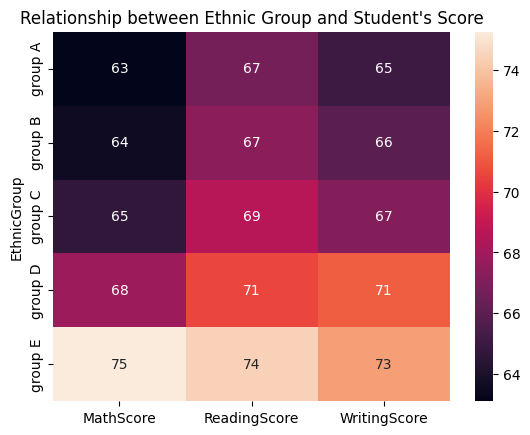

In [148]:
#visualizing the above values in heatmap
sns.heatmap(p10, annot=True)
plt.title("Relationship between Ethnic Group and Student's Score")
plt.show()

*this ethnic Group is also impacting the Student Score, but we shouldn't consider this as a factor*

***Checking for Outliners***

<Axes: xlabel='MathScore'>

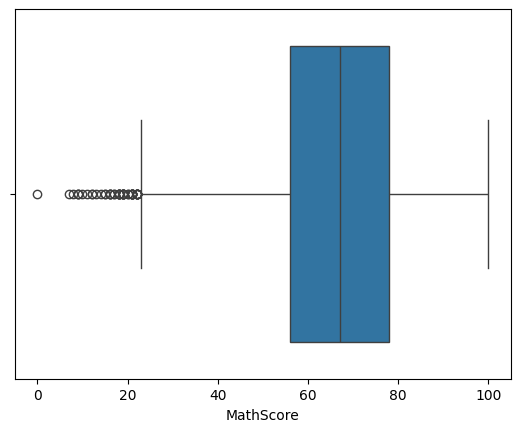

In [141]:
#Outliners in MathScore
sns.boxplot(data=df, x='MathScore')

<Axes: xlabel='ReadingScore'>

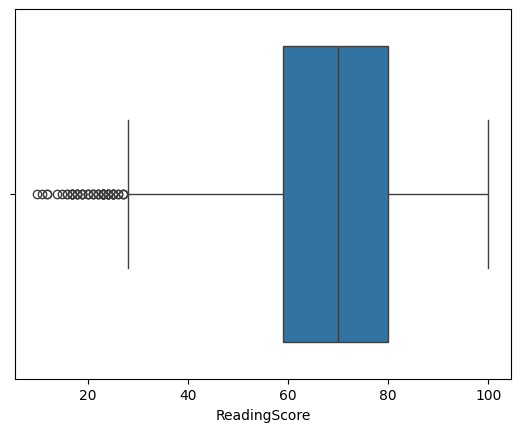

In [142]:
#Outliners in ReadingScore
sns.boxplot(data=df, x='ReadingScore')

<Axes: xlabel='WritingScore'>

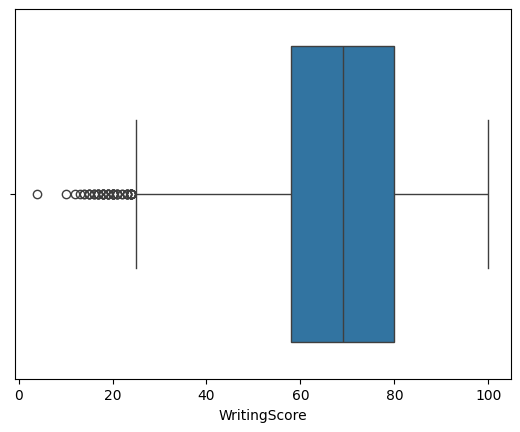

In [143]:
#Outliners in Writing Score
sns.boxplot(data=df, x='WritingScore')

*Outliner are present for all the three factors and these ouliners are maily present in between 0-30*

***distributio of Ethnic Groups***

In [144]:
#checcking for unique values in EthnicGroup
df['EthnicGroup'].unique()

array(['group B', 'group C', 'group D', 'group A', 'group E'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x21625fbdb50>,
 [Text(1.068687275096026, 0.26059069063923057, 'groupA'),
  Text(0.481716787036013, 0.9889130078463427, 'groupB'),
  Text(-1.0232267726186985, 0.4037412188473238, 'groupC'),
  Text(-0.1383618697910617, -1.0912634846763276, 'groupD'),
  Text(0.9939306614987242, -0.4712768190063125, 'groupE')],
 [Text(0.5829203318705596, 0.14214037671230756, '7.61%'),
  Text(0.26275461111055254, 0.5394070951889142, '20.35%'),
  Text(-0.5581236941556537, 0.22022248300763111, '32.12%'),
  Text(-0.07547011079512456, -0.5952346280052695, '25.83%'),
  Text(0.5421439971811223, -0.25706008309435224, '14.09%')])

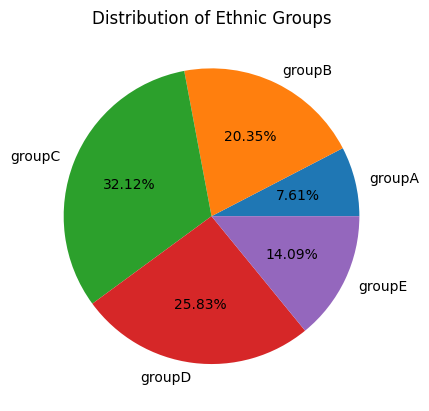

In [154]:
#counting the Ethnic group values
groupA=df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB=df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC=df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD=df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE=df.loc[(df['EthnicGroup'] == 'group E')].count()

#plotting the pie chart
list=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
label=['groupA','groupB','groupC','groupD','groupE']
plt.title('Distribution of Ethnic Groups')
plt.pie(list, labels=label, autopct='%0.2f%%')

[Text(0, 0, '3915'),
 Text(0, 0, '6181'),
 Text(0, 0, '4970'),
 Text(0, 0, '1465'),
 Text(0, 0, '2712')]

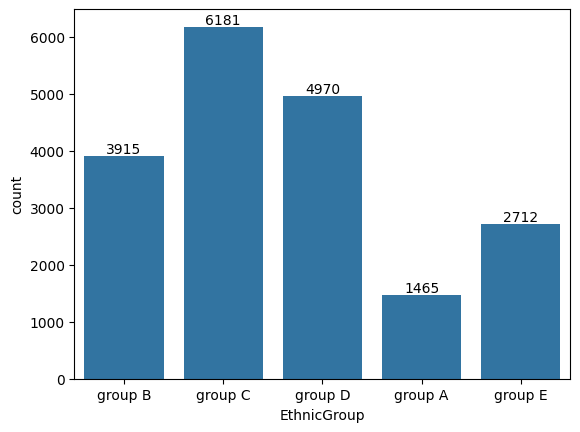

In [158]:
#checking for correct values in Ethnic Group
c=sns.countplot(data=df, x='EthnicGroup')
c.bar_label(c.containers[0])

***Findings***

*The major factor that are impacting a student's score are given below*

**1. Lunch Type** is impacting the students score the mostly

**2.Parent's Education** is impacting Student Score highly*

**3.Test Preparation** is impacting Student Score Medium*

**4.Weekly Study Hours** is impacting Student Score >10hrs is making good score, 5-10 is making moderate score, <5 is making less score*

**5. Parent Marital Status** is making very less or no/neligable impacting on Student Score*

* Based on my analysis, these above factors are making impact on student Score*